In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.metrics import F1Score 
from keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import ImageFont
import visualkeras

# Data and Model

In [4]:
# Load the data
(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()

In [5]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [6]:
# Create the model
model = models.Sequential()

model.add(layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)       

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[F1Score(average='weighted')])

In [8]:
# Train the model
model.fit(train_images, train_labels, epochs=35, batch_size=64)

Epoch 1/35

938/938 [==============================] - 153s 138ms/step - loss: 0.2058 - f1_score: 0.9379
Epoch 2/35
938/938 [==============================] - 119s 127ms/step - loss: 0.0643 - f1_score: 0.9796
Epoch 3/35
938/938 [==============================] - 123s 131ms/step - loss: 0.0491 - f1_score: 0.9851
Epoch 4/35
938/938 [==============================] - 120s 128ms/step - loss: 0.0443 - f1_score: 0.9867
Epoch 5/35
938/938 [==============================] - 117s 125ms/step - loss: 0.0382 - f1_score: 0.9884
Epoch 6/35
938/938 [==============================] - 118s 125ms/step - loss: 0.0362 - f1_score: 0.9890
Epoch 7/35
938/938 [==============================] - 88s 94ms/step - loss: 0.0306 - f1_score: 0.9908
Epoch 8/35
938/938 [==============================] - 59s 62ms/step - loss: 0.0274 - f1_score: 0.9916
Epoch 9/35
938/938 [==============================] - 59s 63ms/step - loss: 0.0274 - f1_score: 0.9912
Epoch 10/35
938/938 [==============================] - 59s 63ms/step 

In [9]:
# Predict the test data
y_true = test_labels
y_pred = model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


# Reporting

In [10]:
# Convert predicted values to integer labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to integer labels
y_true_int = np.argmax(y_true, axis=1)

# Calculate the classification report
report = classification_report(y_true_int, y_pred_classes, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9929    0.9990    0.9959       980
           1     0.9956    0.9982    0.9969      1135
           2     0.9971    0.9952    0.9961      1032
           3     0.9921    0.9950    0.9936      1010
           4     0.9899    0.9990    0.9944       982
           5     0.9933    0.9933    0.9933       892
           6     0.9989    0.9864    0.9926       958
           7     0.9922    0.9961    0.9942      1028
           8     0.9949    0.9938    0.9944       974
           9     0.9970    0.9871    0.9920      1009

    accuracy                         0.9944     10000
   macro avg     0.9944    0.9943    0.9943     10000
weighted avg     0.9944    0.9944    0.9944     10000



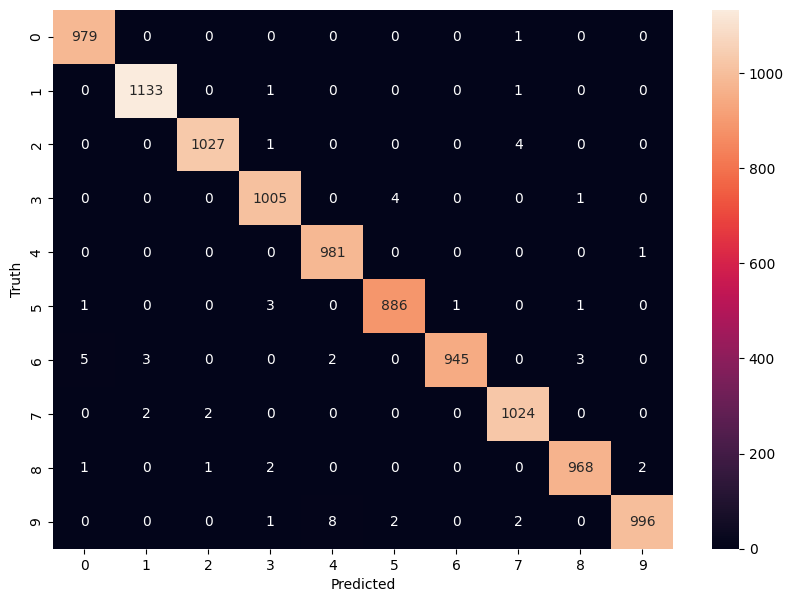

In [11]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_int, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [12]:
# Generate classification report as dictionary
report_dict = classification_report(y_true_int, y_pred_classes, digits=4, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the DataFrame to an Excel file
filename = 'cnn_mnist_opt'
report_df.to_excel(filename + '.xlsx', sheet_name=filename)

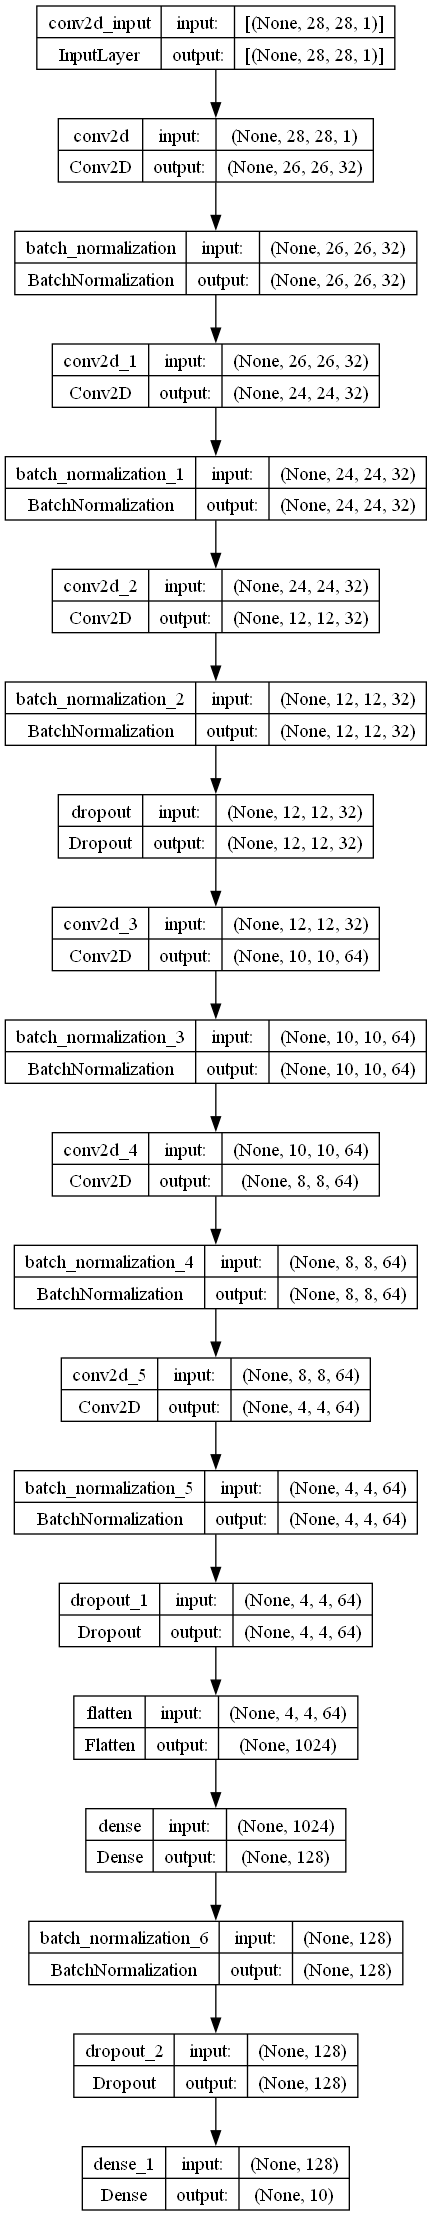

In [13]:
# Export model image with plot_model
plot_model(model, to_file=filename + '.png', show_shapes=True, show_layer_names=True)

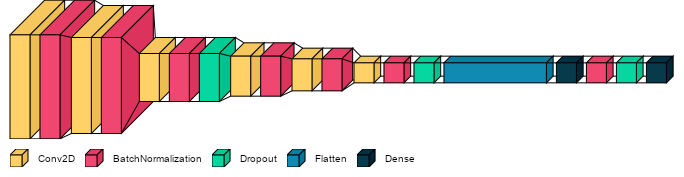

In [14]:
# Export model image with visualkeras
font = ImageFont.truetype("C:\\Windows\\Fonts\\Arial.ttf", 10)
visualkeras.layered_view(model, legend=True, font=font, to_file=filename + '.png')